# Computing Portfolio Metrics with Python

We are going to start with two very simple ones, return and volatility (standard deviation). </br>
***Important***: We will use the historical volatility, but it is not uncommon for professionals to work with forecasted volatility (using ARIMA, GARCH models) or even working with implied volatility (extracting it for the asset's options)

### Calling the Libraries

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

### Getting the data

First let's compile some data to analyse. We will use ETFs to reflect some assets classes historical performance

| Ticker | Asset Class |
|:-:|:-:|
| AGG | Bonds |
| GLD | Gold |
| FXE | Euro |
| VNQ | Real State |
| IVV | SPY |
| VWO | Emerging Markets |


In [10]:
#Defining two lists, one with the tickers and the other with class name
tickers = ["AGG", 'GLD', "FXE",'VNQ', 'IVV', 'VWO']
class_ = ["Bonds", 'Gold', 'Euro', 'Real State', 'SPY', "Emerging Markets"]

#We will save the returns in this list
hist_returns = []

for asset in tickers:
    #We save the time series prices here (the maximum information available) 
    security = yf.Ticker(asset).history(period="max")
    #We calculate the returns
    returns = security['Close'].pct_change().dropna()
    #We save the results in the list
    hist_returns.append(returns)

#We transform the list with returns in a data frame object
data = pd.concat(hist_returns, 1)
#We get only the dates where all etfs were available
data = data.dropna()
#We nominated the columns
data.columns = class_

data

,Bonds,Gold,Euro,Real State,SPY,Emerging Markets
Date,,,,,,
2005-12-13,0.003810,-0.017314,-0.000084,0.004867,0.006322,0.006618
2005-12-14,0.002697,-0.025169,0.004601,0.001937,0.004476,-0.003945
2005-12-15,-0.000997,-0.002185,-0.002831,-0.007573,-0.003831,-0.002805
2005-12-16,-0.000100,-0.002986,0.003841,0.003572,-0.002512,-0.003806
2005-12-19,0.000798,0.002595,-0.000666,-0.013105,-0.005743,0.002492
...,...,...,...,...,...,...
2021-12-27,0.000525,0.002367,-0.000759,0.016976,0.014324,0.003253
2021-12-28,-0.000438,-0.004310,-0.001234,0.003684,-0.000772,-0.003446
2021-12-29,-0.002977,-0.000297,0.003042,0.006730,0.001044,-0.004271


### Plotting the past performance

<ipython-input-61-92352dc0d0fe>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  yaxis = p.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


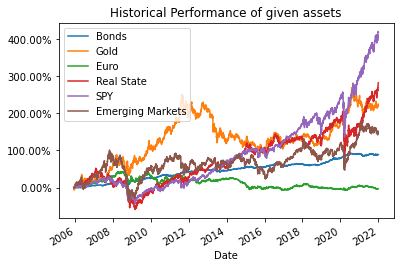

In [61]:
#We make a cumulative product to calculate the acumulated return
acc_returns = (data+1).cumprod()-1

p = acc_returns.plot(title = "Historical Performance of given assets")
vals = p.get_yticks()
yaxis = p.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

### Computing return

There are many ways to do that, but in order to increase computational efficiency, we will get the ln(1 + r), where r are the returns, sum them, and convert them back again. </br>
This uses the log properties.

In [29]:
def cum_return(r):
    '''
    The function receives a time series returns and convert them into ln(1 + r),
    sum them, and then exponentiate back.
    '''
    cumReturn = np.expm1(np.log1p(r).sum())
    return cumReturn

data.apply(lambda x : cum_return(x))

Bonds               0.885397
Gold                2.246004
Euro               -0.029684
Real State          2.820356
SPY                 4.184613
Emerging Markets    1.511730
dtype: float64

### Computting the Annualized Return

This facilitates the comparisson between returns in differente time periods.

In [57]:
def ann_return(r):
    '''
    Calculates the annualized return, based in daily returns
    '''
    
    acumulated_retun = cum_return(r) #Using the function that we declared before
    n_periods = len(r)
    annualized_return = (acumulated_retun + 1) ** (365 / n_periods) - 1 
    return annualized_return

print("Annualized Return 2006-2022")
data.apply(lambda x : ann_return(x))

Annualized Return 2006-2022


Bonds               0.058950
Gold                0.112211
Euro               -0.002718
Real State          0.128699
SPY                 0.160262
Emerging Markets    0.086744
dtype: float64

### Computing Volatility

It is the most common risk metric in the financial market, it assumes that the returns are normally distributed.

In [59]:
def ann_vol(r):
    '''
    It receives a series of returns and compute the annualized vollatility based in daily returns
    '''
    return r.std()*(365**0.5)

print("Annualized Vol 2006-2022")
data.apply(lambda x : ann_vol(x))

Annualized Vol 2006-2022


Bonds               0.059624
Gold                0.220400
Euro                0.110032
Real State          0.374613
SPY                 0.235499
Emerging Markets    0.340778
dtype: float64

Let's stop here for today. There is a lot more to come yet, I hope you had enjoyed.